In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob
import matplotlib.pyplot as plt
from keras.applications import ResNet50
from keras.models import Model
from keras.utils import to_categorical
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model


In [45]:
images_path = 'archive/Flickr_Data/Images/'
images = glob(images_path+'*.jpg')
len(images)

5513

In [46]:
images[:5]

['archive/Flickr_Data/Images\\1002674143_1b742ab4b8.jpg',
 'archive/Flickr_Data/Images\\1003163366_44323f5815.jpg',
 'archive/Flickr_Data/Images\\1007129816_e794419615.jpg',
 'archive/Flickr_Data/Images\\1009434119_febe49276a.jpg',
 'archive/Flickr_Data/Images\\1015118661_980735411b.jpg']

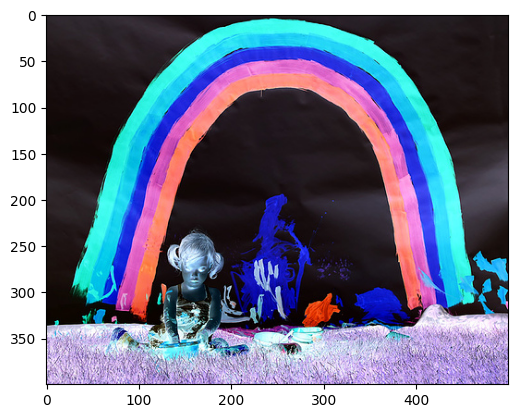

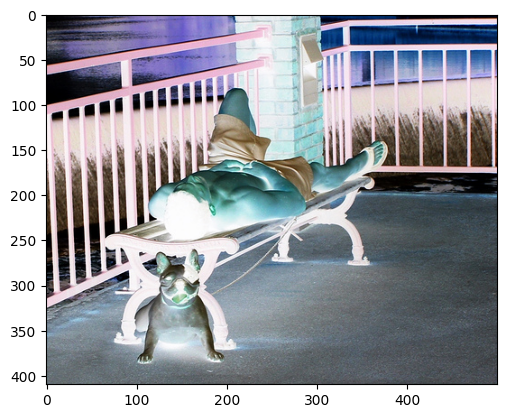

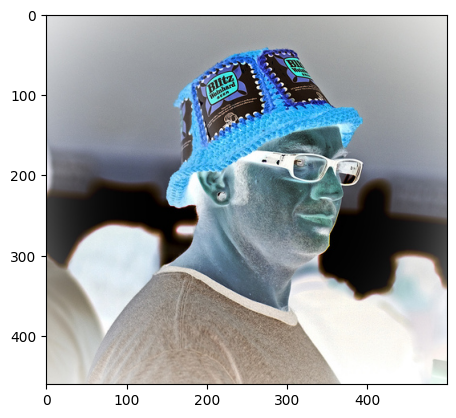

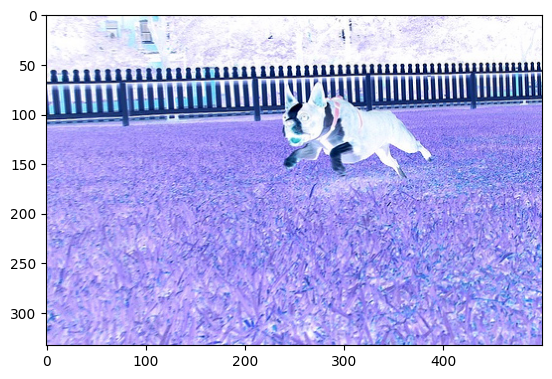

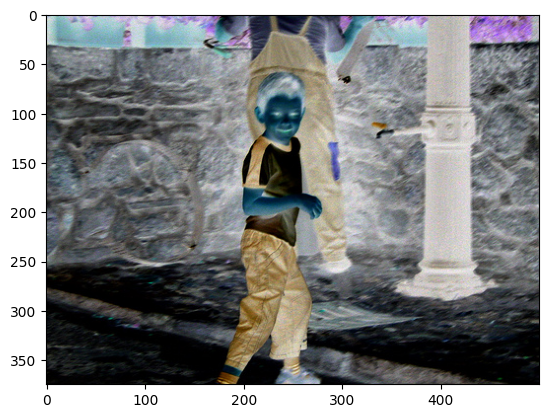

In [47]:
for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = 255 - img
    plt.imshow(img)

In [48]:

incept_model = ResNet50(include_top=True)

last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [49]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))

    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)

    img_name = i.split('\\')[-1]
    print(img_name)

    images_features[img_name] = pred
    if img_name in images_features:
        print("HI")
    count += 1

    if count > 99:
        break

    elif count % 50 == 0:
        print(count)


1/1 [==============================] - 1s 846ms/step
1002674143_1b742ab4b8.jpg
HI
1/1 [==============================] - 0s 78ms/step
1003163366_44323f5815.jpg
HI
1/1 [==============================] - 0s 67ms/step
1007129816_e794419615.jpg
HI
1/1 [==============================] - 0s 74ms/step
1009434119_febe49276a.jpg
HI
1/1 [==============================] - 0s 80ms/step
1015118661_980735411b.jpg
HI
1/1 [==============================] - 0s 63ms/step
1015584366_dfcec3c85a.jpg
HI
1/1 [==============================] - 0s 69ms/step
101654506_8eb26cfb60.jpg
HI
1/1 [==============================] - 0s 69ms/step
101669240_b2d3e7f17b.jpg
HI
1/1 [==============================] - 0s 86ms/step
1016887272_03199f49c4.jpg
HI
1/1 [==============================] - 0s 78ms/step
1019077836_6fc9b15408.jpg
HI
1/1 [==============================] - 0s 63ms/step
1019604187_d087bf9a5f.jpg
HI
1/1 [==============================] - 0s 70ms/step
1020651753_06077ec457.jpg
HI
1/1 [========================

In [50]:
len(images_features)


100

In [51]:
caption_path = 'archive/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'

In [52]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [53]:
len(captions)
print(captions[1])


1000268201_693b08cb0e.jpg#1	A girl going into a wooden building .


In [54]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2]
        #print(img_name)
        caption = i.split('\t')[1]
        #print(caption)
        if img_name in images_features:
            #print("hi")
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]

            else:
                captions_dict[img_name].append(caption)

    except:
        pass

In [55]:
len(captions_dict)

100

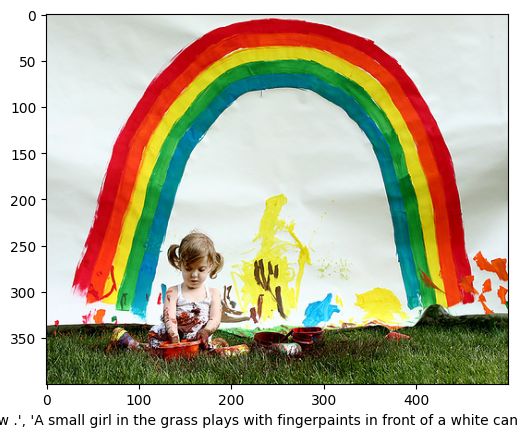

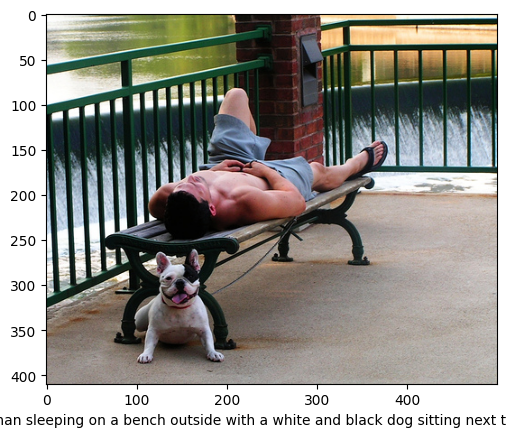

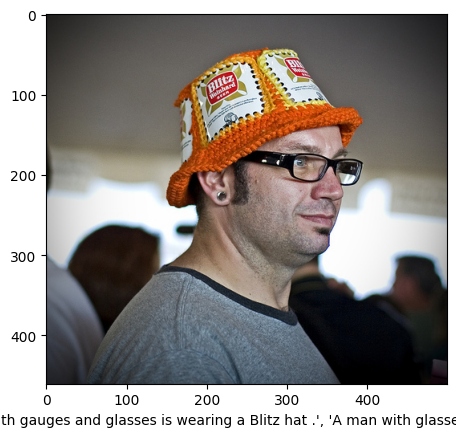

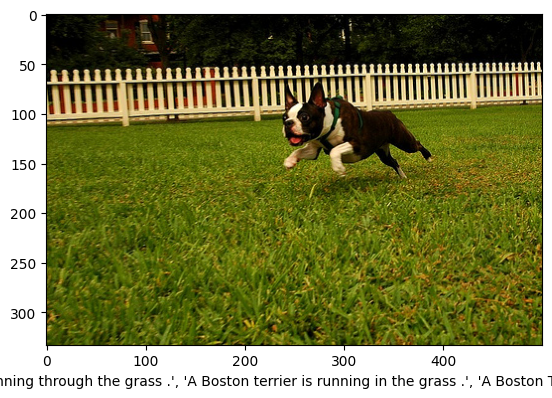

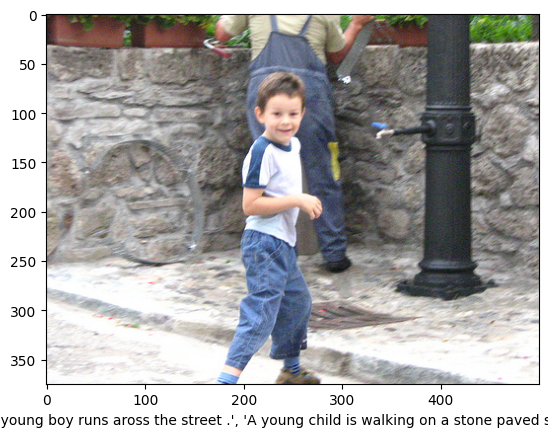

In [56]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]


    img = cv2.imread(img_name)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('\\')[-1]])
    plt.imshow(img)

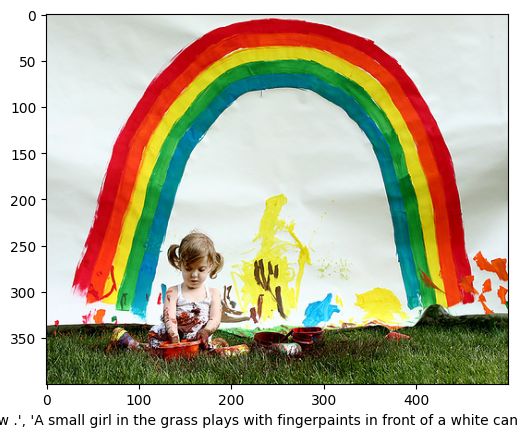

In [57]:
import matplotlib.pyplot as plt

for k in images_features.keys():
    plt.figure()

    img_name = 'archive/Flickr_Data/Images/' + k


    img = cv2.imread(img_name)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

    break

In [58]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified


In [59]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)


In [60]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

len(count_words)

818

In [61]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

len(new_dict)

818

In [62]:
new_dict['<OUT>'] = len(new_dict)
captions_backup = captions_dict.copy()
captions_dict = captions_backup.copy()

In [63]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [64]:
captions_dict

{'1002674143_1b742ab4b8.jpg': [[1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   6,
   9,
   10,
   2,
   11,
   12,
   13,
   14,
   15,
   6,
   2,
   16,
   17,
   18],
  [1, 2, 3, 4, 19, 20, 6, 9, 10, 2, 21, 11, 12, 17, 18],
  [1,
   2,
   22,
   4,
   6,
   23,
   24,
   25,
   13,
   26,
   6,
   9,
   10,
   2,
   27,
   28,
   13,
   2,
   12,
   29,
   30,
   17,
   18],
  [1, 31, 19, 2, 4, 13, 32, 20, 6, 9, 10, 2, 12, 33, 17, 18],
  [1, 34, 4, 13, 32, 33, 35, 6, 23, 24, 17, 18]],
 '1003163366_44323f5815.jpg': [[1,
   2,
   36,
   37,
   29,
   2,
   38,
   39,
   40,
   41,
   8,
   42,
   43,
   17,
   18],
  [1, 2, 36, 37, 29, 23, 38, 44, 45, 2, 27, 41, 19, 46, 47, 17, 18],
  [1, 2, 36, 48, 29, 2, 38, 35, 13, 2, 27, 49, 50, 41, 20, 51, 44, 43, 17, 18],
  [1, 2, 52, 36, 53, 29, 2, 54, 38, 13, 40, 41, 17, 18],
  [1, 36, 55, 29, 38, 56, 57, 10, 41, 20, 29, 58, 18]],
 '1007129816_e794419615.jpg': [[1, 2, 36, 6, 59, 60, 61, 62, 63, 64, 17, 18],
  [1, 2, 36, 65, 59, 60, 61, 49, 66

In [65]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 5, 6, 7, 8, 6, 9, 10, 2, 11, 12, 13, 14, 15, 6, 2, 16, 17, 18]
[1, 2, 22, 4, 6, 23, 24, 25, 13, 26, 6, 9, 10, 2, 27, 28, 13, 2, 12, 29, 30, 17, 18]
[1, 2, 209, 49, 59, 210, 206, 211, 212, 42, 23, 213, 206, 20, 51, 44, 2, 214, 13, 2, 86, 42, 215, 17, 18]
[1, 2, 36, 19, 56, 23, 204, 10, 2, 193, 137, 44, 40, 182, 6, 9, 10, 354, 355, 39, 131, 36, 138, 29, 17, 18]
[1, 2, 36, 6, 165, 493, 2, 3, 88, 137, 6, 23, 186, 49, 519, 141, 43, 44, 520, 343, 521, 258, 71, 173, 43, 17, 18]
[1, 23, 4, 6, 23, 551, 516, 552, 19, 93, 51, 44, 205, 34, 148, 553, 144, 19, 68, 2, 50, 554, 49, 23, 427, 19, 555, 556, 17, 18]
[1, 31, 149, 302, 34, 148, 206, 144, 488, 758, 56, 2, 759, 760, 206, 144, 13, 443, 761, 736, 49, 706, 6, 14, 182, 206, 49, 144, 13, 762, 763, 17, 18]


In [66]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0

    X = []
    y_in = []
    y_out = []

    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)

    return X, y_in, y_out

In [67]:
X, y_in, y_out = generator(images_features, captions_dict)
len(X), len(y_in), len(y_out)
MAX_LEN

33

In [68]:
len(X), len(y_in), len(y_out)

(6518, 6518, 6518)

In [69]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')
X.shape, y_in.shape, y_out.shape

((6518, 2048), (6518, 33), (6518, 819))

In [70]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               262272    
                                                                 
 repeat_vector_1 (RepeatVec  (None, 33, 128)           0         
 tor)                                                            
                                                                 
Total params: 262272 (1.00 MB)
Trainable params: 262272 (1.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 33, 128)           104832    
                                                                 
 lstm_3 (LSTM)               (None, 33, 256)           394240 

In [71]:
model.fit([X, y_in], y_out, batch_size=512, epochs=11)

Epoch 1/11
13/13 [==============================] - 15s 894ms/step - loss: 5.3573 - accuracy: 0.1026
Epoch 2/11
13/13 [==============================] - 15s 1s/step - loss: 4.9550 - accuracy: 0.1000
Epoch 3/11
13/13 [==============================] - 13s 1s/step - loss: 4.9342 - accuracy: 0.1132
Epoch 4/11
13/13 [==============================] - 13s 1s/step - loss: 4.9078 - accuracy: 0.1125
Epoch 5/11
13/13 [==============================] - 13s 1s/step - loss: 4.8749 - accuracy: 0.1164
Epoch 6/11
13/13 [==============================] - 13s 1s/step - loss: 4.8036 - accuracy: 0.1183
Epoch 7/11
13/13 [==============================] - 13s 1s/step - loss: 4.7790 - accuracy: 0.1132
Epoch 8/11
13/13 [==============================] - 13s 1s/step - loss: 4.7306 - accuracy: 0.1135
Epoch 9/11
13/13 [==============================] - 13s 1s/step - loss: 4.6912 - accuracy: 0.1183
Epoch 10/11
13/13 [==============================] - 13s 1s/step - loss: 4.6214 - accuracy: 0.1189
Epoch 11/11
13/1

In [72]:
inv_dict = {v:k for k, v in new_dict.items()}

In [73]:
model.save('model.h5')

C:\Users\varsh\code\pycharm\September 2023\ML hw1\venv\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [74]:
model.save_weights('mine_model_weights.h5')
np.save('vocab.npy', new_dict)

def getImage(x):

    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (299,299))

    test_img = np.reshape(test_img, (1,299,299,3))

    return test_img

1/1 [==============================] - 0s 31ms/step


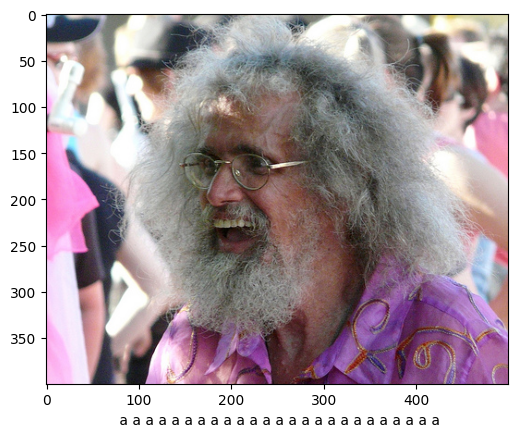

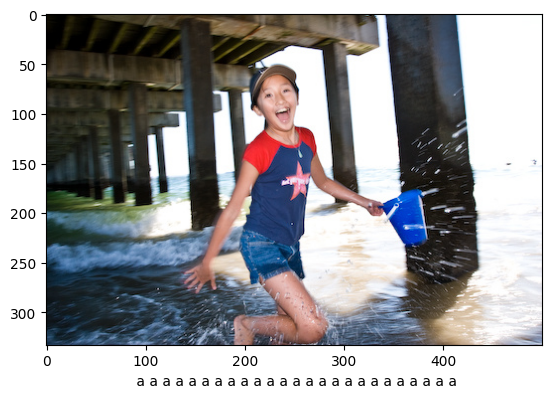

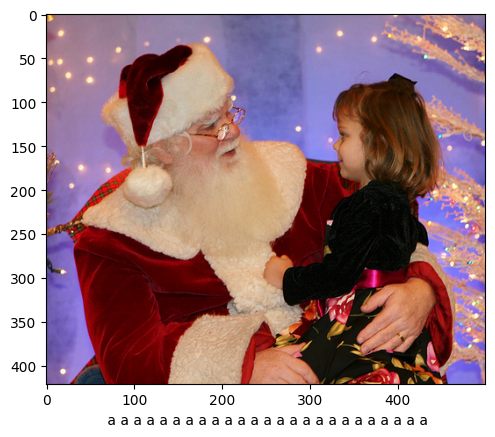

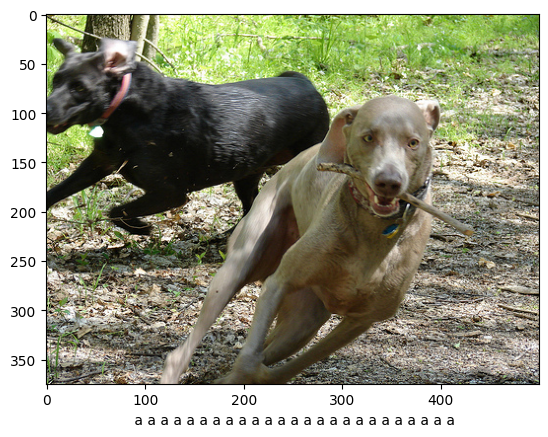

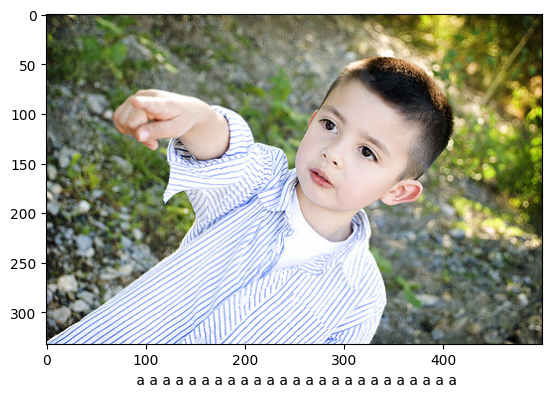

In [76]:
for i in range(5):

    no = np.random.randint(0,5000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)

    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)
        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word

        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)

    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)
